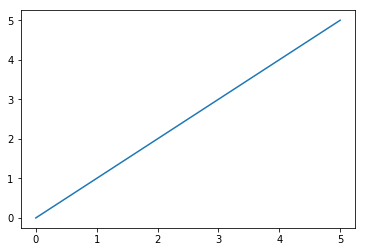

In [18]:
#  Making predictions about wine quality using linear regression
# lets try some baisc examples on drawing straight lines
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline

x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 2, 3, 4, 5]

# Draw y = x line
plt.plot(x,y);


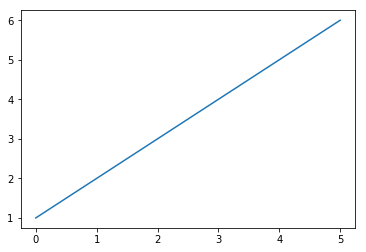

In [19]:
x = np.asarray([0, 1, 2, 3, 4, 5])
y = x+1
plt.plot(x,y);    

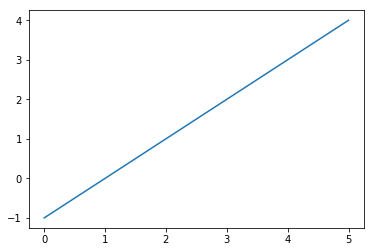

In [20]:
# Plot the equation y=x−1, using the existing x variable.
x = np.asarray([0, 1, 2, 3, 4, 5])
y = x - 1
plt.plot(x,y);


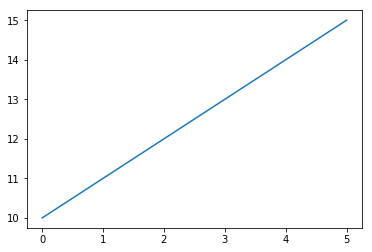

In [21]:
# Plot the equation y=x+10, using the existing x variable.
x = np.asarray([0, 1, 2, 3, 4, 5])
y = x + 10 
plt.plot(x,y);


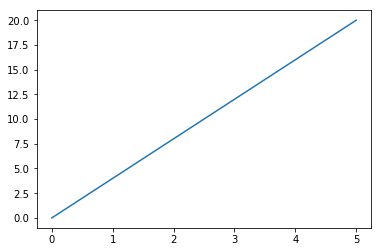

In [22]:
# plot the x and y axis using slope
x = np.asarray([0, 1, 2, 3, 4, 5])
y = 4*x 
plt.plot(x,y);


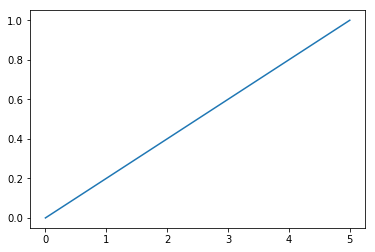

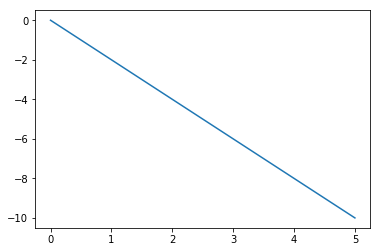

In [23]:
x = np.asarray([0, 1, 2, 3, 4, 5])
y = .2*x 
plt.plot(x,y);
plt.show()

x = np.asarray([0, 1, 2, 3, 4, 5])
y = -2*x 
plt.plot(x,y);
plt.show()

In [25]:
# read dataset

wine_quality = pd.read_csv("Probability_and_Statistics_in_Python\\wine_quality_white.csv")
print(wine_quality.columns)
wine_quality.head()


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [44]:
# calucalte the slope to predict the "quality" column (y) using the "density" column (x)


covariance = wine_quality["density"].cov(wine_quality["quality"])
print(covariance)
variance_density = wine_quality["density"].var()
print(variance_density)
slope_density = covariance/variance_density
print(slope_density)


-0.000813527438195
8.945524185781229e-06
-90.9423999421


In [46]:
# calculate intercept
mean_quality = wine_quality["quality"].mean()
mean_density = wine_quality["density"].mean()
slope_density = wine_quality["density"].cov(wine_quality["quality"])/wine_quality["density"].var()
intercept_density = mean_quality - (slope_density * mean_density)
print(intercept_density)

96.2771445761


In [48]:
# another way of calculating intercept using numpy cov function
from numpy import cov

# This function will take in two columns of data, and return the slope of the linear regression line.
def calc_slope(x, y):
    return cov(x, y)[0, 1] / x.var()
intercept_density = wine_quality["quality"].mean() - (calc_slope(wine_quality["density"], wine_quality["quality"]) * wine_quality["density"].mean())
print(intercept_density)

96.2771445761


In [65]:
# compue linear regression to predict the "quality" column (y) using the "density" column (x) ; y = mx+b

x = wine_quality["density"]
y = [(slope_density * i)+intercept_density for i in x ]
print(slope_density)
print(intercept_density)
print(y[0:5])


-90.9423999421
96.2771445761
[5.2438022339708823, 5.8803990335658227, 5.7803623936294741, 5.734891193658413, 5.734891193658413]


In [69]:
# calculate slope and intercept using function from scipy
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(wine_quality["density"],wine_quality["quality"])

print(slope)
print(intercept)

y = [(slope * i)+intercept for i in wine_quality["density"] ]

print(y[0:5])

-90.9423999421
96.2771445761
[5.2438022339714507, 5.8803990335663912, 5.7803623936300568, 5.7348911936589815, 5.7348911936589815]


In [74]:
# calculate residuals

actual_y = wine_quality["quality"]
predicted_y = y

residuals = [(actual_y[i]-predicted_y[i])**2 for i in range(len(actual_y))]
sum_residuals = sum(residuals)
print(sum_residuals)

3478.68946969


In [77]:
# calcualte standard error

number_y_points = len(actual_y)-2
standard_error = (sum_residuals/number_y_points) ** (1/2)
print(standard_error)

0.842921491036


In [84]:
# calculate how many are within 1 standard error away

diffs = abs(actual_y - predicted_y)
error_1 = standard_error * 1
diffs_list_1 = [d for d in diffs if d <= error_1]
count_1 = len(diffs_list_1) 
percentage = count_1/len(actual_y) * 100

print(percentage )

68.45651286239281


In [86]:
# calculate how many are within 2 standard error away

diffs = abs(actual_y - predicted_y)
error_2 = standard_error * 2
diffs_list_2 = [d for d in diffs if d <= error_2]
count_1 = len(diffs_list_2) 
percentage = count_1/len(actual_y) * 100

print(percentage )

93.56880359330339


In [87]:
# calculate how many are within 3 standard error away

diffs = abs(actual_y - predicted_y)
error_3 = standard_error * 3
diffs_list_3 = [d for d in diffs if d <= error_3]
count_1 = len(diffs_list_3) 
percentage = count_1/len(actual_y) * 100

print(percentage )

99.36708860759494
